# Healthcare Insurance Analysis & Prediction

## Introduction

This project revolves around analyzing and predicting healthcare insurance charges based on various personal attributes, geographic factors, and lifestyle choices. The dataset used for this analysis and prediction task is the **Healthcare Insurance Dataset**.

## Objective

Our primary objective is to understand the relationship between personal attributes, geographic factors, and lifestyle choices with medical insurance charges. Additionally, we aim to develop a predictive model to estimate healthcare expenses for individuals.

## Analysis

1. **Data Exploration:** Investigating the dataset's structure, examining the distribution of variables, and gaining insights into the relationships between different features.
2. **Data Preprocessing:** Thorough cleaning procedures, addressing missing values, and preparing the data for subsequent modeling stages.
3. **Exploratory Data Analysis (EDA):** Visualizing relationships between variables and extracting meaningful patterns to understand the factors influencing healthcare insurance charges.
4. **Feature Selection:** Identifying and selecting the most relevant features crucial for our predictive task.
5. **Model Selection and Training:** Choosing suitable machine learning algorithms tailored to our regression objective, and training and refining the selected models to optimize performance.
6. **Model Evaluation:** Assessing the efficacy of the models using diverse evaluation metrics to ensure accurate predictions.
7. **Feature Importance:** Analyzing the importance of features in the predictive model to understand which factors contribute significantly to healthcare insurance charges.
8. **Conclusion:** A concise summary encapsulating our findings and an evaluation of the predictive model's effectiveness.

## Data Dictionary

| Feature    | Description                                            |
|------------|--------------------------------------------------------|
| `age`      | The insured person's age.                              |
| `sex`      | Gender (male or female) of the insured.                |
| `bmi`      | Body Mass Index: A measure of body fat based on height and weight. |
| `children` | The number of dependents covered.                      |
| `smoker`   | Whether the insured is a smoker (yes or no).          |
| `region`   | The geographic area of coverage.                       |
| `charges`  | The medical insurance costs incurred by the insured person. |

## Acknowledgements

Dataset source: [Healthcare Insurance Dataset](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data)

## Let's get started our PRRRRRRRRRRREDICTION!

#### Importing required libraries

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

#### Load the dataset

In [2]:
path = "/Users/stevenschepanski/Documents/Projects/Health_Insurance/data/"

In [3]:
# Read data from the CSV files into data frames
insurance = pd.read_csv(path + "insurance.csv")

### 1. Data Exploration

In [4]:
# Display the first few rows of the DataFrame using the 'head()' method
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check the shape of the DataFrame (rows, columns)
print('The data frame has',insurance.shape[0],'rows and',insurance.shape[1],'columns.')

The data frame has 1338 rows and 7 columns.


In [6]:
# Display a concise summary of the DataFrame'
# The 'info' method provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage
# The 'verbose=True' argument shows the full summary, including the counts of unique values in each column
insurance.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


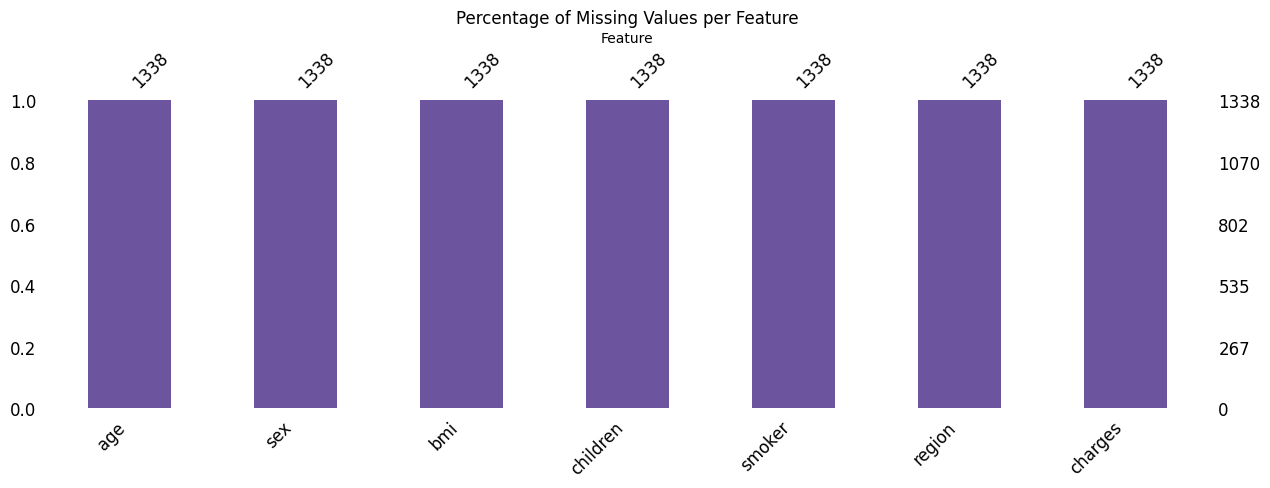

In [7]:
# custom colour
custom_colour = (108/255, 84/255, 158/255) # RGB(108, 84, 158)

# Visualize missing values using missingno
msno.bar(insurance, figsize=(15, 4), color=custom_colour, fontsize=12, labels=True)

# Set plot labels and title
plt.title("Percentage of Missing Values per Feature")
plt.ylabel("Ratio of Missing Values per Feature")
plt.xlabel("Feature")

# Show the plot
plt.show()


There are no missing values in the data set which means we do not need to impute any data later on.

In [8]:
# Check for duplicate rows in the DataFrame
insurance.duplicated().sum()

1

In [9]:
# Remove duplicate rows from the DataFrame
insurance.drop_duplicates(inplace=True)

In [10]:
# Check for shape again
print('The data frame has',insurance.shape[0],'rows and',insurance.shape[1],'columns.')

The data frame has 1337 rows and 7 columns.


In [11]:
# Display descriptive statistics for numerical columns in the DataFrame 'df_resized'

# The 'describe' method provides summary statistics (mean, std, min, 25%, 50%, 75%, max) for numerical columns
# The 'T' at the end transposes the result for better readability
insurance.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


The dataset consists of 1337 observations, with each feature exhibiting a consistent count. Deduplication measures have been implemented to ensure the integrity and consistency of the data. Notably, features such as `age`, `bmi`, `children`, and `charges` display a comprehensive range of statistical parameters.

For `age`, the dataset reveals a mean of 39.22 years, with a standard deviation of 14.04. The minimum age is 18 years, while the maximum is 64 years. The quartile values (25%, 50%, and 75%) provide additional insights into the distribution of age within the dataset.

The `bmi` feature exhibits a mean of 30.66, accompanied by a standard deviation of 6.10. The BMI values range from 15.96 to 53.13, with quartile values providing a detailed overview of the distribution.

In terms of `children`, the mean is approximately 1.10, with a standard deviation of 1.21. The range spans from 0 to 5 children, showcasing diversity within the dataset. Quartile values contribute to a nuanced understanding of the distribution of the number of children.

Finally, `charges` display a mean of 13,279.12, with a standard deviation of 12,110.36. The minimum charge is 1,121.87, and the maximum is 63,770.43. Quartile values provide granularity regarding the distribution of charges within the dataset.

### 2. Data Preprocessing

The dataset exhibits no anomalies or abnormal values, with all features displaying meaningful and expected data. Given the absence of issues, it appears that comprehensive data preprocessing may not be necessary as the dataset is already in a suitable state for analysis.


### 3. Exploratory Data Analysis

In the Exploratory Data Analysis (EDA), my focus will be on examining the data distribution, investigating the correlation among features, and exploring the connection between the features and the target variable. I will commence by scrutinizing the data distribution, and subsequently, I will delve into the relationship between the target and the independent variables.

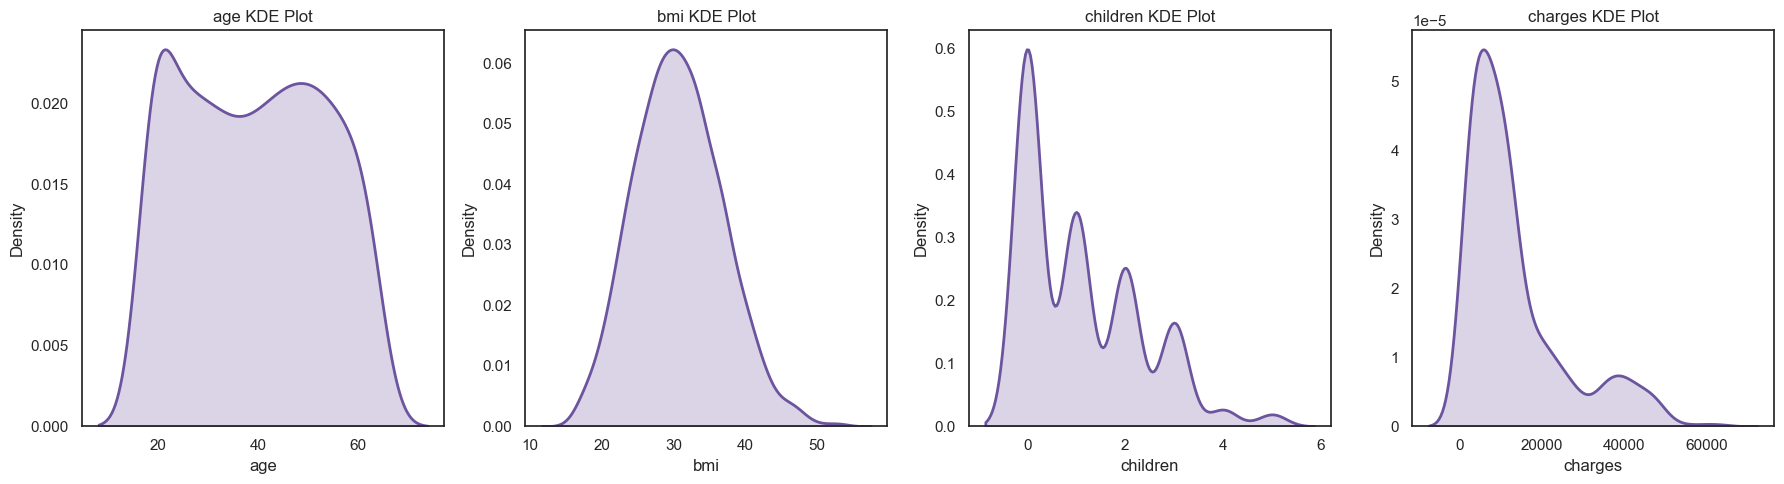

In [12]:
# Set the style for better aesthetics
sns.set(style="white")

# Create a 1x4 grid for numerical variables
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Numerical variables
numerical_variables = ['age', 'bmi', 'children', 'charges']

# Plot KDEs for numerical variables
for i, var in enumerate(numerical_variables):
    sns.kdeplot(x=insurance[var], ax=axes[i], fill=True, color=custom_colour, linewidth=2)
    axes[i].set_title(f'{var} KDE Plot')

# Adjust layout for better appearance
plt.tight_layout()

# Show the numerical variable plots
plt.show()

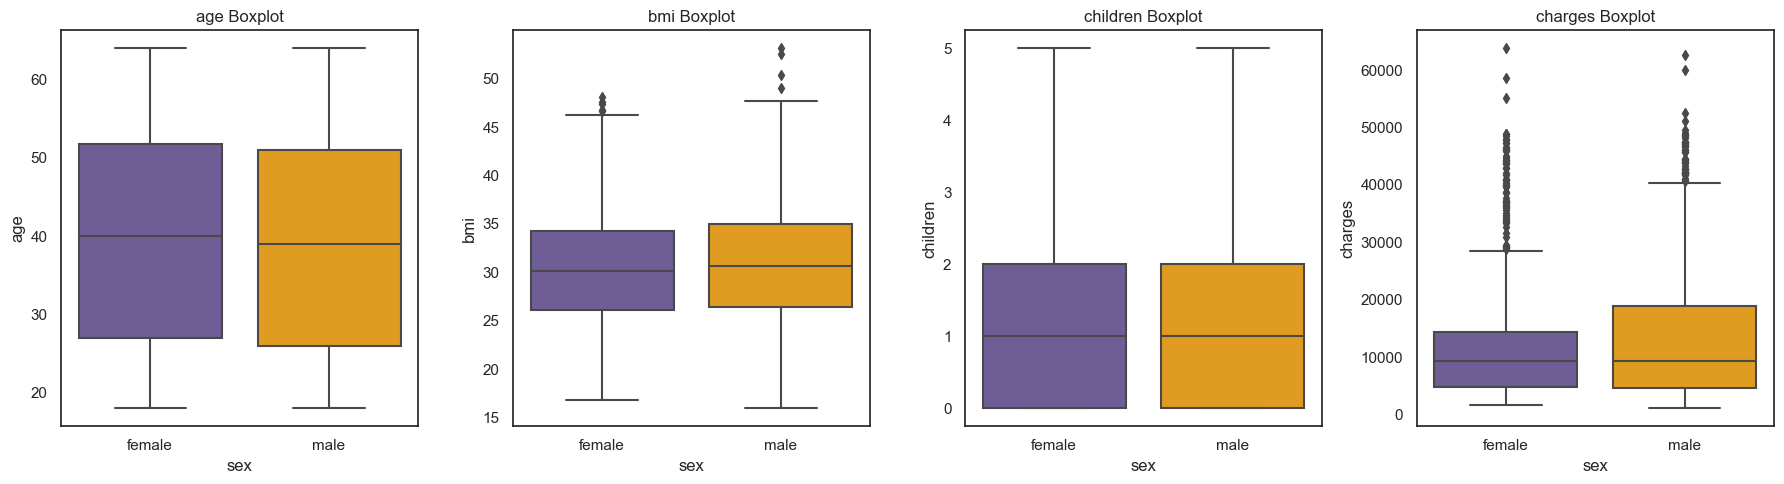

In [13]:
# Set the style for better aesthetics
sns.set(style="white")

# Create a 1x4 grid for numerical variables
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Numerical variables
numerical_variables = ['age', 'bmi', 'children', 'charges']

# Iterate through the variables
for i, var in enumerate(numerical_variables):
    # Boxplot: Plot boxplot in the current subplot
    sns.boxplot(x='sex', y=var, data=insurance, ax=axes[i], palette={'female': custom_colour, 'male': 'orange'})
    axes[i].set_title(f'{var} Boxplot')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

SUMMARY

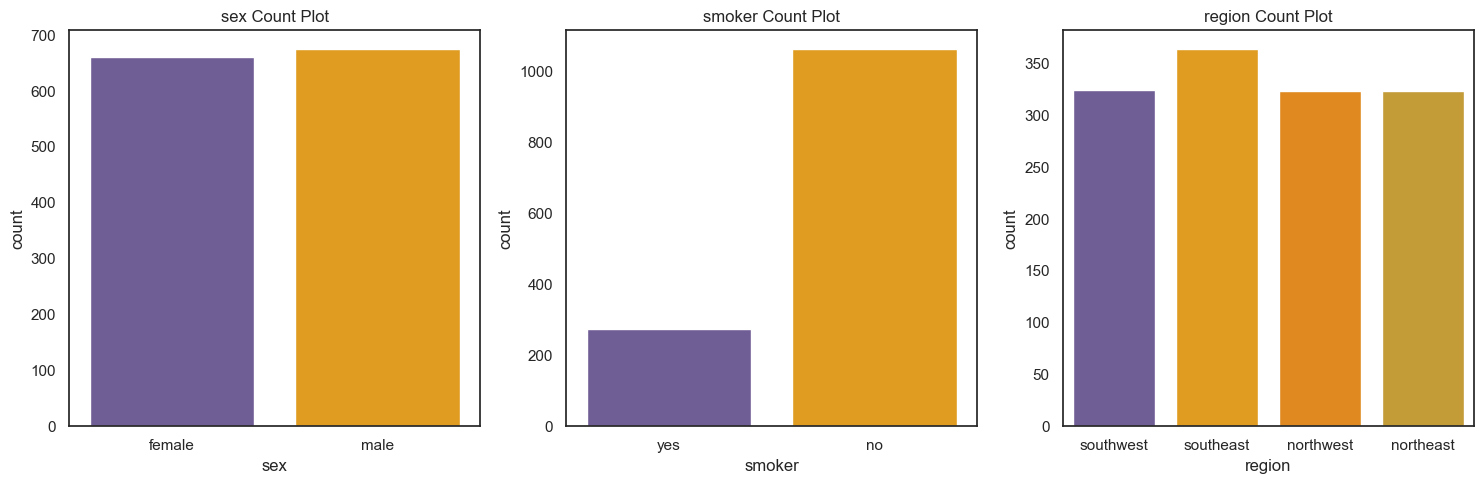

In [14]:
# Create a 1x3 grid for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Categorical variables
categorical_variables = ['sex', 'smoker', 'region']

# Define custom colors for each categorical variable
custom_colors2 = {
    'sex': {'female': custom_colour, 'male': 'orange'},
    'smoker': {'yes': custom_colour, 'no': 'orange'},
    'region': {'northeast': 'goldenrod', 'northwest': 'darkorange', 'southeast': 'orange', 'southwest': custom_colour}
}

# Plot count plots for categorical variables
for i, var in enumerate(categorical_variables):
    sns.countplot(x=insurance[var], ax=axes[i], palette=custom_colors2[var])
    axes[i].set_title(f'{var} Count Plot')

# Adjust layout for better appearance
plt.tight_layout()

# Show the categorical variable plots
plt.show()


SUMMARY

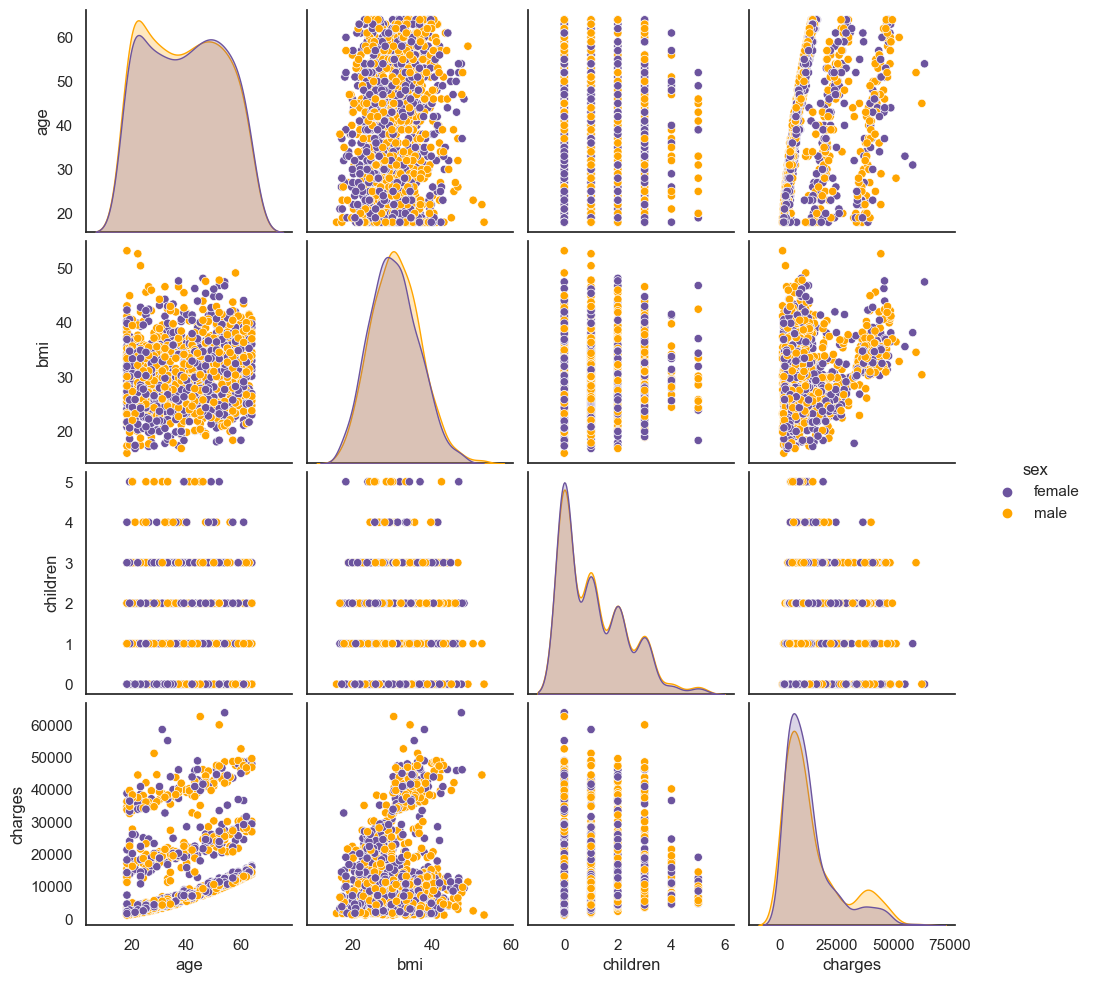

In [15]:
# Define numerical variables for pair plot
numerical_variables = ['age', 'bmi', 'children', 'charges']

# Create a pairplot with 'sex' as the hue
sns.pairplot(insurance, hue='sex', palette={'female': custom_colour, 'male': 'orange'}, vars=numerical_variables)

# Show the pairplot
plt.show()

#### Correlation Matrix Heatmap

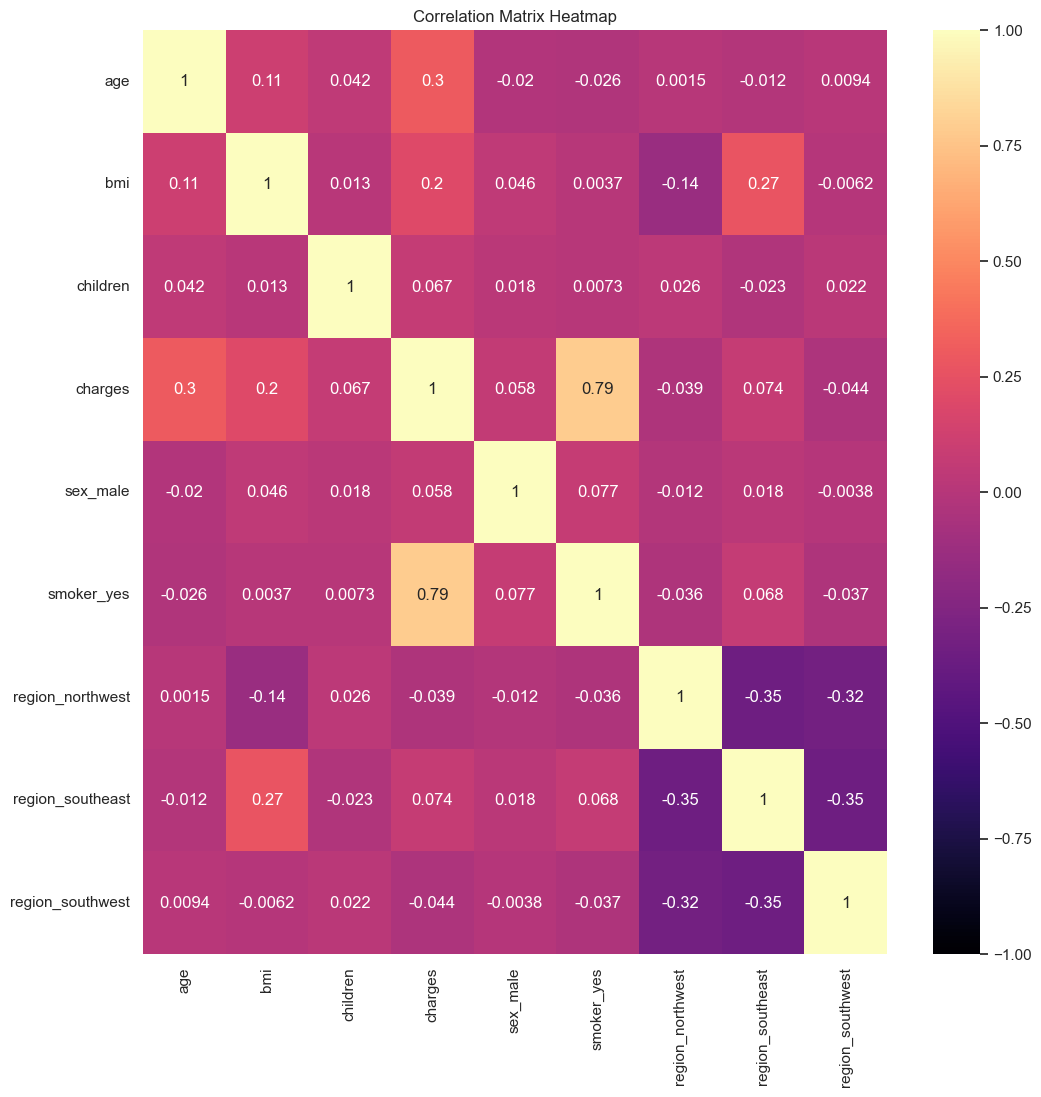

In [16]:
# Create a copy to avoid modifying the original DataFrame
insurance_encoded = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = insurance_encoded.corr()

# Create a mask to hide values outside the range of interest
# mask = (correlation_matrix > 0.3) | (correlation_matrix < -0.3)

# Correlation matrix heatmap with a different color code and annotated values within the specified range
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmax=1, vmin=-1).set_title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


The correlation matrix reveals key associations between various features in the dataset:

- **Age and BMI (`bmi`):** A positive correlation of 0.109 suggests a slight increase in BMI with age.

- **BMI (`bmi`) and Charges (`charges`):** A moderate positive correlation of 0.198 indicates that higher BMI values are associated with increased medical charges.

- **Children and Charges (`charges`):** A weak positive correlation of 0.067 suggests that the number of children covered has a limited impact on medical charges.

- **Charges (`charges`) and Smoking (`smoker_yes`):** A strong positive correlation of 0.787 signifies that smokers tend to incur significantly higher medical charges compared to non-smokers.

- **Sex (Male) and Charges (`charges`):** A weak positive correlation of 0.058 suggests that being male has a limited impact on medical charges.

- **Smoking (`smoker_yes`) and Charges (`charges`):** A strong positive correlation of 0.787 indicates that smokers incur significantly higher medical charges compared to non-smokers.

- **Region (`region_southeast` and `region_southwest`) and Charges (`charges`):** Moderate negative correlations of -0.345 and -0.346 suggest that individuals in the southeast and southwest regions may have slightly lower medical charges compared to other regions.

These correlation insights provide valuable information for understanding potential relationships between features and guide further exploratory analysis. It's important to note that correlation does not imply causation, and additional analyses may be required for a comprehensive interpretation of the data.


### 4. Feature Selection

After a thorough analysis of the descriptive statistics and exploration of feature relationships within the dataset, a conscious decision has been made to abstain from feature selection for this project. The following considerations underpin this decision:

1. **Independence of Features:** The features exhibit a relative degree of independence, with no discernible strong linear correlation observed in the dataset.

2. **Multicollinearity and Domain Knowledge:** Physiological correlations, such as age and maximum heart rate, hold inherent significance for the classification task. Incorporating these relationships into the model aligns with domain knowledge and the nature of the dataset.

3. **Low Dimensionality:** The dataset maintains a manageable number of features, and the absence of high correlations between features mitigates the risk of multicollinearity.

4. **Noisy Features:** Exploratory Data Analysis (EDA) has revealed that the features included in the dataset are relevant for predicting the outcome, and there are no apparent noisy or irrelevant features.

5. **Model Considerations:** Given the task of predicting heart disease, a deliberate choice has been made to utilize logistic regression and decision tree models. Considering the unique characteristics of the dataset—where features demonstrate relative independence, manageable dimensionality, and no apparent noisy or irrelevant features—extensive feature selection methods are intentionally omitted. The focus remains on leveraging the entirety of available features to enhance the robustness and inclusivity of the predictive models. This approach aligns with the specific requirements and objectives of the project, emphasizing a holistic consideration of features for accurate predictions.

In [17]:
# Transformation for column 'sex'
insurance['sex'] = insurance['sex'].map({'female': 0, 'male': 1})

# Transformation for column 'bmi'
bins = [0, 18.5, 25, 30, float('inf')]
labels = [0, 1, 2, 3]
insurance['bmi_class'] = pd.cut(insurance['bmi'], bins=bins, labels=labels, right=False)

# Transformation for column 'smoker'
insurance['smoker'] = insurance['smoker'].map({'no': 0, 'yes': 1})

### 5. Model Selection and Training Overview

After careful consideration of the dataset and the objective to predict medical insurance charges, a diverse set of regression-based algorithms has been chosen for building and evaluating predictive models. The pipeline includes both linear and ensemble models, offering a comprehensive exploration of the dataset.

### Feature Transformation and Model Selection Pipeline:

| Task                              | Features                                          | Pipeline                   |
|-----------------------------------|---------------------------------------------------|----------------------------|
| Normalization                     | `age`, `bmi`, `children`, `charges`               | MinMaxScaler               |
|                                   |                                                   |                            |
| Model Selection Considerations    |                                                   |                            |
|                                   | One-Hot Encode categorical features (`sex`, `smoker`, `region`, `bmi_class`) |                            |
|                                   |                                                   |                            |
| Training Pipeline                 | All available features                            | 1. Normalize with MinMaxScaler <br> 2. Implement the following regression algorithms: <br> a) Linear Regression <br> b) Ridge Regression <br> c) Lasso Regression <br> d) Decision Tree Regression <br> e) Random Forest Regression <br> f) XGBoost <br> g) LightGBM <br> h) SVM Regression |
|                                   |                                                   |                            |
| Evaluation Metrics                |                                                   | Utilize regression metrics (e.g., R-squared, Mean Absolute Error, Mean Squared Error) for model assessment. |

### Algorithm-Specific Considerations:

- **Linear Regression:**
  - Provides a baseline model for straightforward interpretation.

- **Ridge and Lasso Regression:**
  - Address potential overfitting and perform feature selection.

- **Decision Tree Regression:**
  - Capture non-linear relationships and complex interactions.

- **Random Forest Regression, XGBoost, and LightGBM:**
  - Leverage ensemble methods for enhanced predictive performance.

- **SVM Regression:**
  - Explore its versatility in handling high-dimensional spaces.

This comprehensive approach allows for a thorough exploration of regression models, considering both linear and non-linear relationships within the dataset. The choice of algorithms encompasses a balance between interpretability and predictive power, providing a foundation for further model tuning and evaluation.

### Split in training and test data

In [18]:
# Display the first few rows of the DataFrame
insurance.head()


,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,0,27.900,0,1,southwest,16884.92400,2
1,18,1,33.770,1,0,southeast,1725.55230,3
2,28,1,33.000,3,0,southeast,4449.46200,3
3,33,1,22.705,0,0,northwest,21984.47061,1
4,32,1,28.880,0,0,northwest,3866.85520,2


To ensure a representative and balanced distribution of the target variable in both the training and testing sets, the dataset has been split using the `train_test_split` function with a stratification criterion based on the `sex` of the insured person. This decision is driven by several considerations:

1. **Imbalance in Health Factors:** Health outcomes can be influenced by `sex`-related factors. Stratifying the data by `sex` helps maintain a proportional representation of potential health-related characteristics, ensuring that both sexes are adequately represented in both training and testing subsets.

2. **Preservation of `sex`-Specific Patterns:** If there are specific patterns or trends related to healthcare expenses that are `sex`-specific, stratification helps preserve these patterns in both sets. This is particularly important when building predictive models that aim to generalise well across different demographic groups.

3. **Enhanced Model Generalization:** Stratification aids in improving the generalization capability of the predictive model. By maintaining similar `sex` distributions in both sets, the model is better equipped to learn patterns that are applicable to various `sex` groups.

In summary, the stratification by the `sex` of the insured person contributes to a more robust and unbiased dataset splitting process, essential for developing a predictive model that performs well across diverse demographic categories.

In [19]:
# Extract features and target variable
X = insurance.drop(columns=['charges'])
y = insurance['charges']

# Split the data into training and testing sets with stratification
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=insurance['sex'])


### The Model

In [20]:
# Pipeline for normalization
pipeline_normalize = Pipeline([
    ('normalize', MinMaxScaler())  # Normalize values using MinMaxScaler
])


In [25]:
# Define a ColumnTransformer for all models
column_transformer = ColumnTransformer([
    # Normalization for specified features
    ('normalize_features', pipeline_normalize, ['age', 'bmi', 'children']),
    
    # One-Hot Encode categorical features
    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class']),
], remainder='passthrough')

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Define the pipelines for different models
# Linear Regression
pipeline_linear_regression = Pipeline([
    ('ct', column_transformer),  # Apply the ColumnTransformer
    ('model', LinearRegression())  # Linear Regression model
])

# Ridge Regression
pipeline_ridge_regression = Pipeline([
    ('ct', column_transformer),  # Apply the ColumnTransformer
    ('model', Ridge())  # Ridge Regression model
])

# Lasso Regression
pipeline_lasso_regression = Pipeline([
    ('ct', column_transformer),  # Apply the ColumnTransformer
    ('model', Lasso())  # Lasso Regression model
])

# Decision Tree Regression
pipeline_decision_tree = Pipeline([
    ('ct', column_transformer),  # Apply the ColumnTransformer
    ('model', DecisionTreeRegressor())  # Decision Tree Regression model
])

# Random Forest Regression
pipeline_random_forest = Pipeline([
    ('ct', column_transformer),  # Apply the ColumnTransformer
    ('model', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))  # Random Forest Regression model
])

# XGBoost Regression
pipeline_xgboost = Pipeline([
    ('ct', column_transformer),  # Apply the ColumnTransformer
    ('model', XGBRegressor(n_estimators=100, max_depth=5, random_state=42))  # XGBoost Regression model
])

# LightGBM Regression
pipeline_lightgbm = Pipeline([
    ('ct', column_transformer),  # Apply the ColumnTransformer
    ('model', LGBMRegressor(n_estimators=100, max_depth=5, random_state=42))  # LightGBM Regression model
])

# SVM Regression
pipeline_svm = Pipeline([
    ('ct', column_transformer),  # Apply the ColumnTransformer
    ('model', SVR(kernel='linear', C=1))  # SVM Regression model
])


In [37]:
# Train and evaluate each pipeline
models = [
    'Linear', 'Ridge', 'Lasso',
    'Decision Tree', 'Random Forest',
    'XGBoost', 'LightGBM', 'SVM'
]

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Dictionary to store evaluation metrics
model_metrics = {}

for model_name, pipeline in zip(models, [pipeline_linear_regression, pipeline_ridge_regression, pipeline_lasso_regression,
                                        pipeline_decision_tree, pipeline_random_forest, pipeline_xgboost,
                                        pipeline_lightgbm, pipeline_svm]):
    # Suppress output by setting verbose to False
    pipeline.verbose = False
    pipeline.fit(Xtrain, ytrain)
    y_pred = pipeline.predict(Xtest)
    metrics = {
        'R-squared': r2_score(ytest, y_pred),
        'MAE': mean_absolute_error(ytest, y_pred),
        'MSE': mean_squared_error(ytest, y_pred)
    }
    model_metrics[model_name] = metrics
    # Omit the print statement to suppress output
    # print(f'{model_name}:\nR-squared: {metrics["R-squared"]:.3f}, MAE: {metrics["MAE"]:.3f}, MSE: {metrics["MSE"]:.3f}\n')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 11
[LightGBM] [Info] Start training from score 13359.275055
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

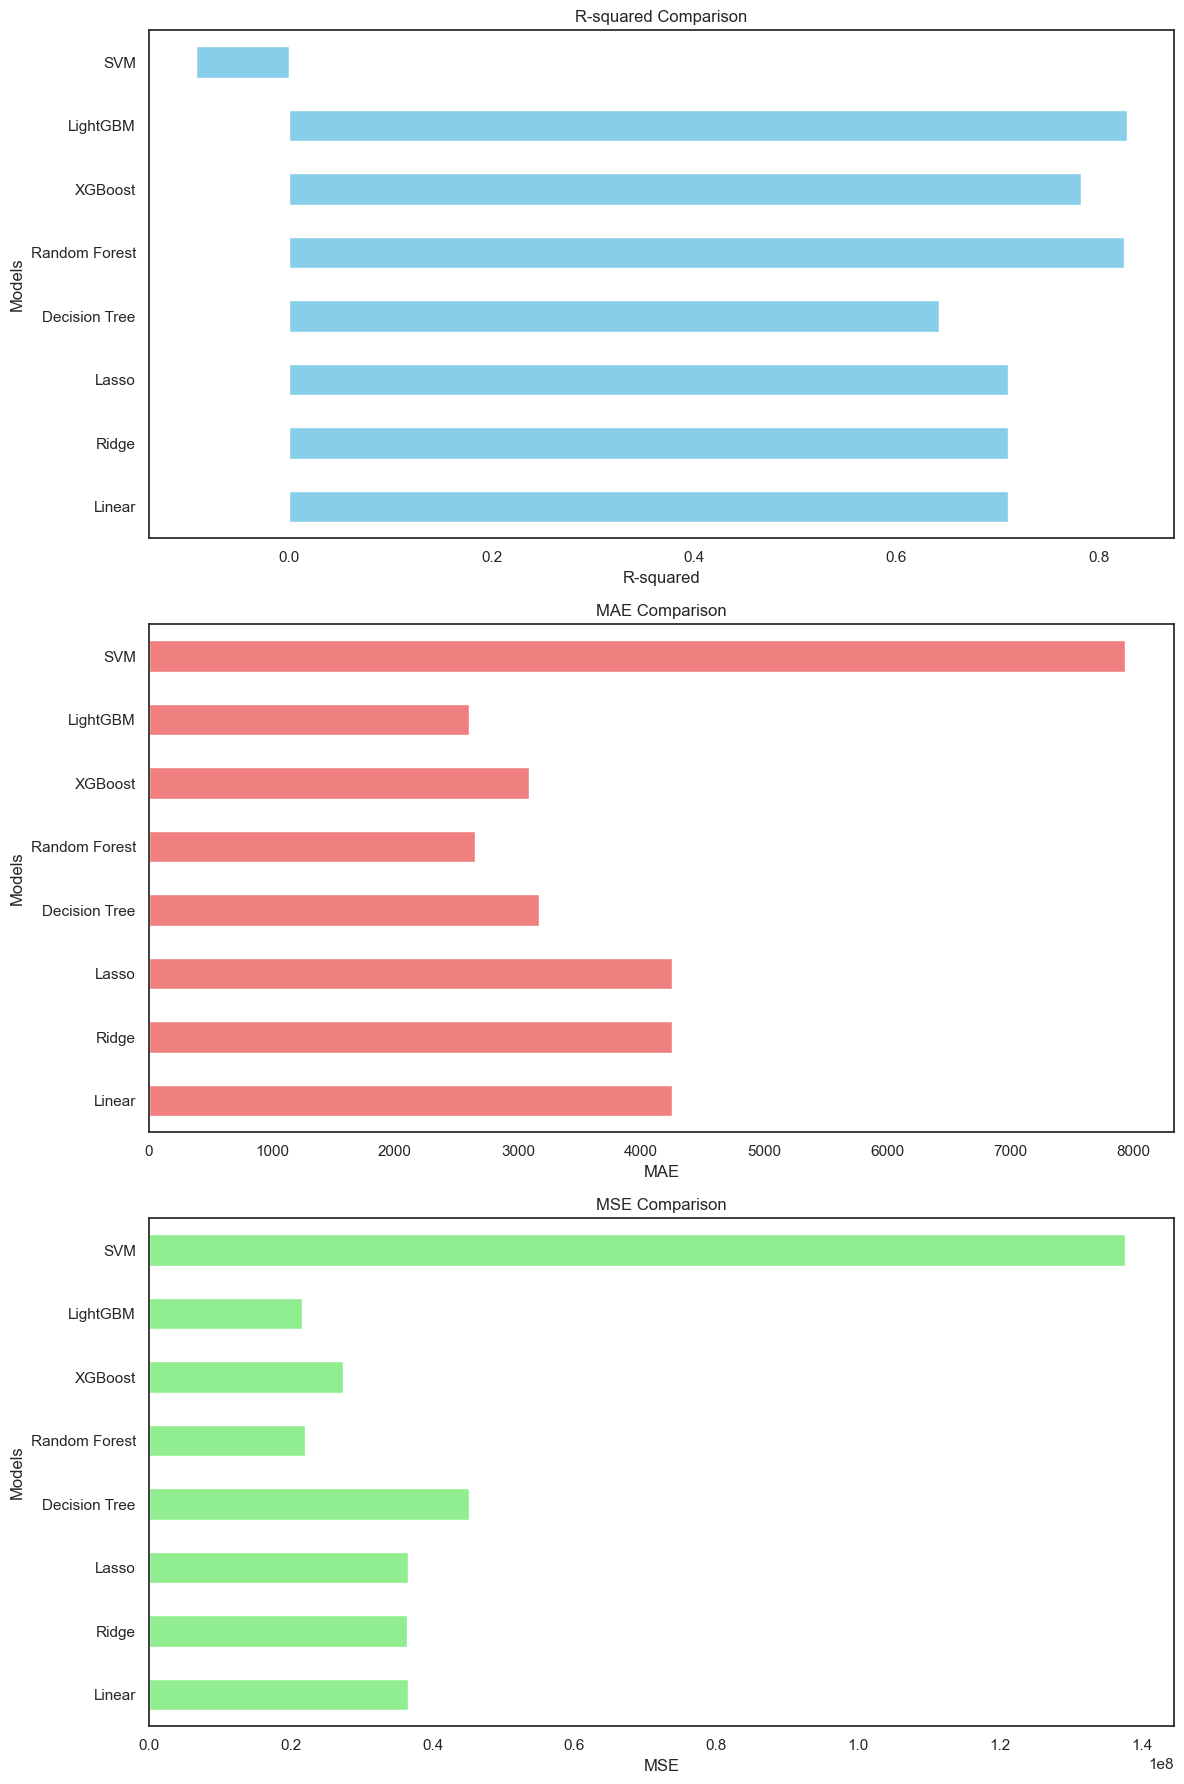

In [39]:
# Convert the model_metrics dictionary to a DataFrame for easy plotting
metrics_df = pd.DataFrame(model_metrics)

# Transpose the DataFrame to have models on the y-axis and metrics on the x-axis
metrics_df = metrics_df.transpose()

# Create subplots for R-squared, MAE, and MSE
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot R-squared
metrics_df['R-squared'].plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_xlabel('R-squared')
axes[0].set_ylabel('Models')
axes[0].set_title('R-squared Comparison')

# Plot MAE
metrics_df['MAE'].plot(kind='barh', ax=axes[1], color='lightcoral')
axes[1].set_xlabel('MAE')
axes[1].set_ylabel('Models')
axes[1].set_title('MAE Comparison')

# Plot MSE
metrics_df['MSE'].plot(kind='barh', ax=axes[2], color='lightgreen')
axes[2].set_xlabel('MSE')
axes[2].set_ylabel('Models')
axes[2].set_title('MSE Comparison')

plt.tight_layout()
plt.show()

**R-squared:**
- R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
- Higher values are desirable, indicating better predictive performance.
- LightGBM has the highest R-squared, suggesting that it explains a significant portion of the variance in medical insurance charges.
- SVM has a negative R-squared, indicating poor model fit and unsuitability for this regression task.

**Mean Absolute Error (MAE):**
- MAE represents the average absolute difference between predicted and actual values.
- Smaller values indicate better accuracy.
- LightGBM has the lowest MAE, suggesting it provides the most accurate predictions.
- SVM has the highest MAE, indicating significant prediction errors.

**Mean Squared Error (MSE):**
- MSE measures the average squared difference between predicted and actual values.
- Smaller values indicate better precision.
- LightGBM has the lowest MSE, implying precise predictions.
- SVM has the highest MSE, indicating a significant spread of errors.

In summary, LightGBM appears to be the most promising model for predicting medical insurance charges, considering its high R-squared, low MAE, and low MSE. SVM, on the other hand, performs poorly in all metrics, suggesting it may not be suitable for this regression task.


### Hyperparameter search: Linear Regression

In [41]:
# Retrieve the current parameters of the linear regression pipeline
pipeline_linear_regression.get_params()


{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'region', 'bmi_class'])])),
  ('model', LinearRegression())],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'bmi', 'children']),
                                 ('onehot_encode', OneHotEncoder(drop='first'),
                                  ['sex', 'smoker', 'region',

In [42]:
from scipy.stats import uniform

# Define a dictionary of hyperparameter distributions for a randomized search
param_dist = {
    'model__fit_intercept': [True, False],  # Whether to calculate the intercept for the model
    'model__positive': [True, False]  # When set to True, forces the coefficients to be positive
}


In [43]:
# Set up a randomized search for hyperparameter tuning
# Create a RandomizedSearchCV object with the Linear Regression pipeline, hyperparameter distributions,
# number of iterations, k-fold cross-validation, and parallelization using 4 CPU cores
random_search_linear_regression = RandomizedSearchCV(
    pipeline_linear_regression,
    param_distributions=param_dist,  # Hyperparameter distributions to sample from
    n_iter=5,  # Number of iterations (adjust as needed)
    cv=5,  # Number of cross-validation folds (adjust as needed)
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_linear_regression.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for Linear Regression:", random_search_linear_regression.best_params_)

Best Parameters for Linear Regression: {'model__positive': True, 'model__fit_intercept': False}


### Hyperparameter search: Ridge regression

In [44]:
# Retrieve the current parameters of the logistic regression pipeline
pipeline_ridge_regression.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'region', 'bmi_class'])])),
  ('model', Ridge())],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'bmi', 'children']),
                                 ('onehot_encode', OneHotEncoder(drop='first'),
                                  ['sex', 'smoker', 'region', 'bmi_class

In [45]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_ridge_regression = {
    'model__alpha': uniform(0.1, 10),  # Regularization strength (alpha) for Ridge Regression
    'model__fit_intercept': [True, False],  # Whether to calculate the intercept for the model
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Solver algorithm choices
}


In [46]:
# Set up a randomized search for hyperparameter tuning of Ridge Regression
# Create a RandomizedSearchCV object with the Ridge Regression pipeline, hyperparameter distributions,
# number of iterations, k-fold cross-validation, and parallelization using 1 CPU core
random_search_ridge_regression = RandomizedSearchCV(
    pipeline_ridge_regression,
    param_distributions=param_dist_ridge_regression,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=5,  # Number of cross-validation folds (adjust as needed)
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_ridge_regression.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for Ridge Regression:", random_search_ridge_regression.best_params_)


Best Parameters for Ridge Regression: {'model__alpha': 2.313893141486306, 'model__fit_intercept': False, 'model__solver': 'saga'}


### Hyperparameter search: Lasso Regression

In [47]:
# Retrieve the current parameters of the KNN pipeline
pipeline_lasso_regression.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'region', 'bmi_class'])])),
  ('model', Lasso())],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'bmi', 'children']),
                                 ('onehot_encode', OneHotEncoder(drop='first'),
                                  ['sex', 'smoker', 'region', 'bmi_class

In [48]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_lasso_regression = {
    'model__alpha': uniform(0.1, 10),  # Regularization strength (alpha) for Lasso Regression
    'model__fit_intercept': [True, False],  # Whether to calculate the intercept for the model
    'model__max_iter': [100, 500, 1000],  # Maximum number of iterations for optimization
    'model__selection': ['cyclic', 'random'],  # Method for subproblem optimization
}

In [49]:
# Set up a randomized search for hyperparameter tuning of Lasso Regression
# Create a RandomizedSearchCV object with the Lasso Regression pipeline, hyperparameter distributions,
# number of iterations, k-fold cross-validation, and parallelization using 1 CPU core
random_search_lasso_regression = RandomizedSearchCV(
    pipeline_lasso_regression,
    param_distributions=param_dist_lasso_regression,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=5,  # Number of cross-validation folds (adjust as needed)
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_lasso_regression.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for Lasso Regression:", random_search_lasso_regression.best_params_)

Best Parameters for Lasso Regression: {'model__alpha': 9.851317836113687, 'model__fit_intercept': False, 'model__max_iter': 100, 'model__selection': 'cyclic'}


### Hyperparameter search: Decision tree

In [50]:
# Retrieve the current parameters of the KNN pipeline
pipeline_decision_tree.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'region', 'bmi_class'])])),
  ('model', DecisionTreeRegressor())],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'bmi', 'children']),
                                 ('onehot_encode', OneHotEncoder(drop='first'),
                                  ['sex', 'smoker', 'reg

In [51]:
from scipy.stats import randint

# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_decision_tree = {
    'model__criterion': ['mse', 'friedman_mse', 'mae'],  # Function to measure the quality of a split
    'model__splitter': ['best', 'random'],  # Strategy to choose the split at each node
    'model__max_depth': randint(1, 20),  # Maximum depth of the tree
    'model__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider for the best split
}

In [52]:
# Set up a randomized search for hyperparameter tuning of Decision Tree Regression
# Create a RandomizedSearchCV object with the Decision Tree Regression pipeline, hyperparameter distributions,
# number of iterations, k-fold cross-validation, and parallelization using 1 CPU core
random_search_decision_tree = RandomizedSearchCV(
    pipeline_decision_tree,
    param_distributions=param_dist_decision_tree,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=5,  # Number of cross-validation folds (adjust as needed)
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_decision_tree.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for Decision Tree Regression:", random_search_decision_tree.best_params_)

Best Parameters for Decision Tree Regression: {'model__criterion': 'friedman_mse', 'model__max_depth': 19, 'model__max_features': 'auto', 'model__min_samples_leaf': 19, 'model__min_samples_split': 11, 'model__splitter': 'random'}


### Hyperparameter search: Random Forest

In [53]:
# Retrieve the current parameters of the Random Forest pipeline
pipeline_random_forest.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'region', 'bmi_class'])])),
  ('model', RandomForestRegressor(max_depth=5, random_state=42))],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'bmi', 'children']),
                                 ('onehot_encode', OneHotEncoder(drop='first'),
                            

In [54]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_random_forest = {
    'model__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # Number of trees in the forest
    'model__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'model__max_depth': [int(x) for x in np.linspace(5, 30, num=6)],  # Maximum depth of the tree
    'model__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'model__bootstrap': [True, False],  # Method for sampling data points (with or without replacement)
}


In [55]:
# Set up a randomized search for hyperparameter tuning of Random Forest Regression
# Create a RandomizedSearchCV object with the Random Forest Regression pipeline, hyperparameter distributions,
# number of iterations, k-fold cross-validation, and parallelization using 1 CPU core
random_search_random_forest = RandomizedSearchCV(
    pipeline_random_forest,
    param_distributions=param_dist_random_forest,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=5,  # Number of cross-validation folds (adjust as needed)
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_random_forest.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for Random Forest Regression:", random_search_random_forest.best_params_)

Best Parameters for Random Forest Regression: {'model__bootstrap': True, 'model__max_depth': 20, 'model__max_features': 'auto', 'model__min_samples_leaf': 16, 'model__min_samples_split': 10, 'model__n_estimators': 300}


### Hyperparameter search: XGBoost

In [56]:
# Retrieve the current parameters of the Random Forest pipeline
pipeline_xgboost.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'region', 'bmi_class'])])),
  ('model',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_

In [57]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_xgboost = {
    'model__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # Number of boosting rounds
    'model__learning_rate': uniform(0.01, 0.3),  # Step size shrinkage used to prevent overfitting
    'model__max_depth': [int(x) for x in np.linspace(3, 10, num=7)],  # Maximum depth of a tree
    'model__subsample': uniform(0.5, 0.5),  # Fraction of samples used for fitting the trees
    'model__colsample_bytree': uniform(0.5, 0.5),  # Fraction of features used for fitting the trees
    'model__gamma': [0, 1, 5],  # Minimum loss reduction required to make a further partition on a leaf node
}

In [58]:
# Set up a randomized search for hyperparameter tuning of XGBoost Regression
# Create a RandomizedSearchCV object with the XGBoost Regression pipeline, hyperparameter distributions,
# number of iterations, k-fold cross-validation, and parallelization using 1 CPU core
random_search_xgboost = RandomizedSearchCV(
    pipeline_xgboost,
    param_distributions=param_dist_xgboost,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=5,  # Number of cross-validation folds (adjust as needed)
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_xgboost.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for XGBoost Regression:", random_search_xgboost.best_params_)

Best Parameters for XGBoost Regression: {'model__colsample_bytree': 0.968197374556891, 'model__gamma': 1, 'model__learning_rate': 0.01971816671421858, 'model__max_depth': 4, 'model__n_estimators': 700, 'model__subsample': 0.7690786079484628}


### Hyperparameter search: LightGBM

In [59]:
# Retrieve the current parameters of the Random Forest pipeline
pipeline_lightgbm.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'region', 'bmi_class'])])),
  ('model', LGBMRegressor(max_depth=5, random_state=42))],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'bmi', 'children']),
                                 ('onehot_encode', OneHotEncoder(drop='first'),
                                  ['

In [60]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_lightgbm = {
    'model__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # Number of boosting rounds
    'model__learning_rate': uniform(0.01, 0.3),  # Step size shrinkage used to prevent overfitting
    'model__max_depth': [int(x) for x in np.linspace(3, 10, num=7)],  # Maximum depth of a tree
    'model__subsample': uniform(0.5, 0.5),  # Fraction of samples used for fitting the trees
    'model__colsample_bytree': uniform(0.5, 0.5),  # Fraction of features used for fitting the trees
    'model__reg_alpha': uniform(0, 1),  # L1 regularization term on weights
    'model__reg_lambda': uniform(0, 1),  # L2 regularization term on weights
}

In [61]:
# Set up a randomized search for hyperparameter tuning of LightGBM Regression
# Create a RandomizedSearchCV object with the LightGBM Regression pipeline, hyperparameter distributions,
# number of iterations, k-fold cross-validation, and parallelization using 1 CPU core
random_search_lightgbm = RandomizedSearchCV(
    pipeline_lightgbm,
    param_distributions=param_dist_lightgbm,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=5,  # Number of cross-validation folds (adjust as needed)
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_lightgbm.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for LightGBM Regression:", random_search_lightgbm.best_params_)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 11
[LightGBM] [Info] Start training from score 13418.910636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

### Hyperparameter search: SVM

In [62]:
# Retrieve the current parameters of the Random Forest pipeline
pipeline_svm.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('normalize_features',
                                    Pipeline(steps=[('normalize',
                                                     MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('onehot_encode', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'region', 'bmi_class'])])),
  ('model', SVR(C=1, kernel='linear'))],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('normalize_features',
                                  Pipeline(steps=[('normalize',
                                                   MinMaxScaler())]),
                                  ['age', 'bmi', 'children']),
                                 ('onehot_encode', OneHotEncoder(drop='first'),
                                  ['sex', 'smoker', 'r

In [63]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_svm = {
    'model__C': uniform(0.1, 10),  # Regularization parameter
    'model__kernel': ['linear', 'rbf', 'poly'],  # Kernel choices
    'model__degree': [2, 3, 4],  # Degree of the polynomial kernel (only for 'poly')
    'model__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
    'model__epsilon': uniform(0.01, 0.1),  # Epsilon in the epsilon-SVR model
}

In [64]:
# Set up a randomized search for hyperparameter tuning of SVM Regression
# Create a RandomizedSearchCV object with the SVM Regression pipeline, hyperparameter distributions,
# number of iterations, k-fold cross-validation, and parallelization using 1 CPU core
random_search_svm = RandomizedSearchCV(
    pipeline_svm,
    param_distributions=param_dist_svm,  # Hyperparameter distributions to sample from
    n_iter=10,  # Number of iterations (adjust as needed)
    cv=5,  # Number of cross-validation folds (adjust as needed)
    n_jobs=1  # Parallelize the search using 1 CPU core (adjust as needed)
)

# Fit the model using the randomized search
random_search_svm.fit(Xtrain, ytrain)

# Output the best parameters found by the randomized search
print("Best Parameters for SVM Regression:", random_search_svm.best_params_)

Best Parameters for SVM Regression: {'model__C': 6.929143803626491, 'model__degree': 3, 'model__epsilon': 0.022536878349326973, 'model__gamma': 'scale', 'model__kernel': 'poly'}


### 6. Model Evaluation

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a function for model evaluation
def evaluate_model_regression(model, X, y):
    y_pred = model.predict(X)
    
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mse**0.5
    
    return mae, mse, rmse


In [68]:
# Best parameters for each model
best_params = {
    'Linear Regression': {'model__positive': True, 'model__fit_intercept': False},
    'Ridge Regression': {'model__alpha': 2.313893141486306, 'model__fit_intercept': False, 'model__solver': 'saga'},
    'Lasso Regression': {'model__alpha': 9.851317836113687, 'model__fit_intercept': False, 'model__max_iter': 100, 'model__selection': 'cyclic'},
    'Decision Tree Regression': {'model__criterion': 'friedman_mse', 'model__max_depth': 19, 'model__max_features': 'auto', 'model__min_samples_leaf': 19, 'model__min_samples_split': 11, 'model__splitter': 'random'},
    'Random Forest Regression': {'model__bootstrap': True, 'model__max_depth': 20, 'model__max_features': 'auto', 'model__min_samples_leaf': 16, 'model__min_samples_split': 10, 'model__n_estimators': 300},
    'XGBoost Regression': {'model__colsample_bytree': 0.968197374556891, 'model__gamma': 1, 'model__learning_rate': 0.01971816671421858, 'model__max_depth': 4, 'model__n_estimators': 700, 'model__subsample': 0.7690786079484628},
    'LightGBM Regression': {'model__colsample_bytree': 0.6754963283168608, 'model__learning_rate': 0.029926936959199568, 'model__max_depth': 5, 'model__n_estimators': 700, 'model__reg_alpha': 0.3578243611067906, 'model__reg_lambda': 0.14214522692576814, 'model__subsample': 0.5898129203500291},
    'SVM Regression': {'model__C': 6.929143803626491, 'model__degree': 3, 'model__epsilon': 0.022536878349326973, 'model__gamma': 'scale', 'model__kernel': 'poly'}
}


In [69]:
# Define the models and their corresponding pipelines
models_config = {
    'Linear Regression': {
        'pipeline': Pipeline([
            ('ct', ColumnTransformer(
                transformers=[
                    ('normalize_features', Pipeline([('normalize', MinMaxScaler())]), ['age', 'bmi', 'children']),
                    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class'])
                ], remainder='passthrough')
            ),
            ('model', LinearRegression())
        ])
    },
    'Ridge Regression': {
        'pipeline': Pipeline([
            ('ct', ColumnTransformer(
                transformers=[
                    ('normalize_features', Pipeline([('normalize', MinMaxScaler())]), ['age', 'bmi', 'children']),
                    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class'])
                ], remainder='passthrough')
            ),
            ('model', Ridge())
        ])
    },
    'Lasso Regression': {
        'pipeline': Pipeline([
            ('ct', ColumnTransformer(
                transformers=[
                    ('normalize_features', Pipeline([('normalize', MinMaxScaler())]), ['age', 'bmi', 'children']),
                    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class'])
                ], remainder='passthrough')
            ),
            ('model', Lasso())
        ])
    },
    'Decision Tree Regression': {
        'pipeline': Pipeline([
            ('ct', ColumnTransformer(
                transformers=[
                    ('normalize_features', Pipeline([('normalize', MinMaxScaler())]), ['age', 'bmi', 'children']),
                    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class'])
                ], remainder='passthrough')
            ),
            ('model', DecisionTreeRegressor())
        ])
    },
    'Random Forest Regression': {
        'pipeline': Pipeline([
            ('ct', ColumnTransformer(
                transformers=[
                    ('normalize_features', Pipeline([('normalize', MinMaxScaler())]), ['age', 'bmi', 'children']),
                    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class'])
                ], remainder='passthrough')
            ),
            ('model', RandomForestRegressor())
        ])
    },
    'XGBoost Regression': {
        'pipeline': Pipeline([
            ('ct', ColumnTransformer(
                transformers=[
                    ('normalize_features', Pipeline([('normalize', MinMaxScaler())]), ['age', 'bmi', 'children']),
                    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class'])
                ], remainder='passthrough')
            ),
            ('model', XGBRegressor())
        ])
    },
    'LightGBM Regression': {
        'pipeline': Pipeline([
            ('ct', ColumnTransformer(
                transformers=[
                    ('normalize_features', Pipeline([('normalize', MinMaxScaler())]), ['age', 'bmi', 'children']),
                    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class'])
                ], remainder='passthrough')
            ),
            ('model', LGBMRegressor())
        ])
    },
    'SVM Regression': {
        'pipeline': Pipeline([
            ('ct', ColumnTransformer(
                transformers=[
                    ('normalize_features', Pipeline([('normalize', MinMaxScaler())]), ['age', 'bmi', 'children']),
                    ('onehot_encode', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region', 'bmi_class'])
                ], remainder='passthrough')
            ),
            ('model', SVR())
        ])
    },
}


In [70]:
# Dictionary to store evaluation metrics
model_metrics = {'MAE': {}, 'MSE': {}, 'RMSE': {}}

# Evaluate each model
for model_name, params in best_params.items():
    pipeline = models_config[model_name]['pipeline'].set_params(**params)
    pipeline.fit(Xtrain, ytrain)

    # Evaluate the model
    mae, mse, rmse = evaluate_model_regression(pipeline, Xtest, ytest)

    model_metrics['MAE'][model_name] = mae
    model_metrics['MSE'][model_name] = mse
    model_metrics['RMSE'][model_name] = rmse

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 11
[LightGBM] [Info] Start training from score 13359.275055
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [71]:
# Convert the model_metrics dictionary to a DataFrame for easy plotting
metrics_df = pd.DataFrame(model_metrics)

# Transpose the DataFrame to have models on the y-axis and metrics on the x-axis
metrics_df = metrics_df.transpose()

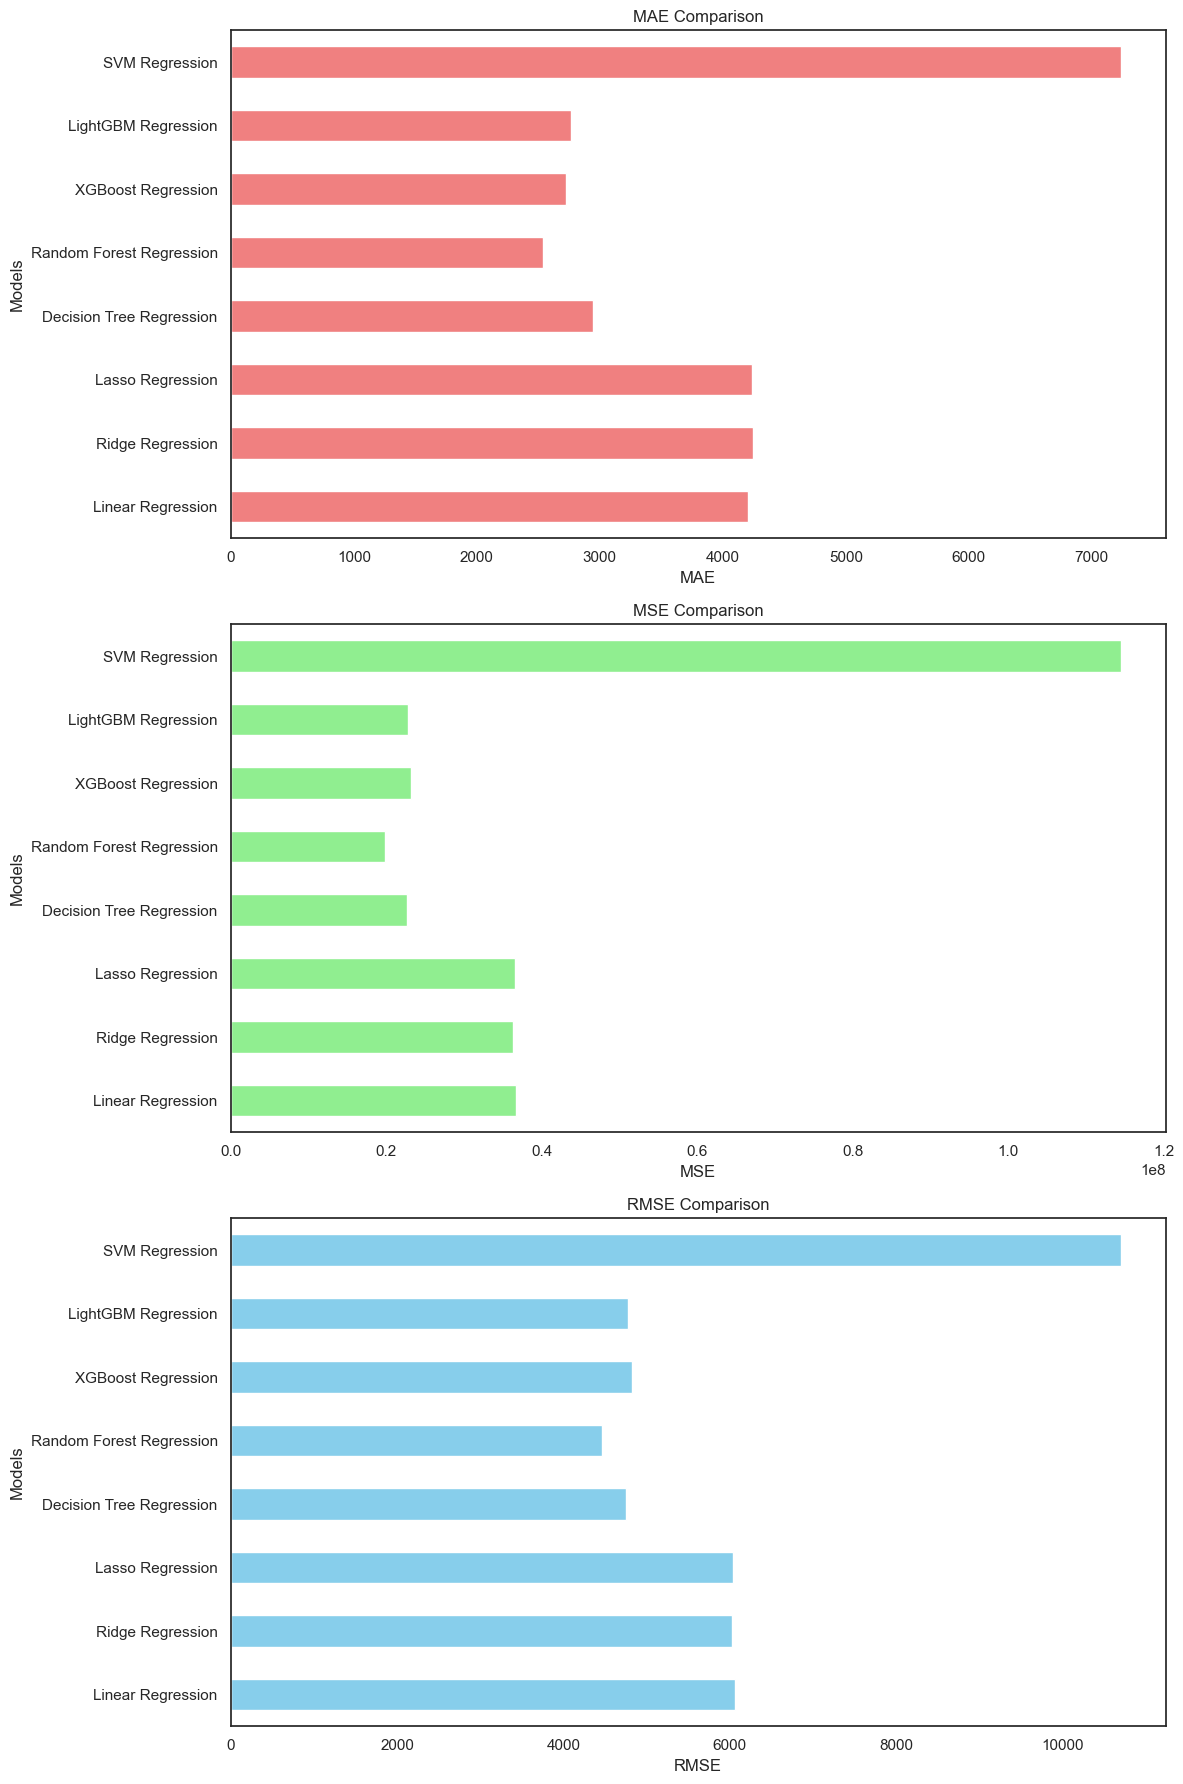

In [76]:
# Create subplots for MAE, MSE, and RMSE
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot MAE
metrics_df.loc['MAE'].plot(kind='barh', ax=axes[0], color='lightcoral')
axes[0].set_xlabel('MAE')
axes[0].set_ylabel('Models')
axes[0].set_title('MAE Comparison')

# Plot MSE
metrics_df.loc['MSE'].plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('MSE')
axes[1].set_ylabel('Models')
axes[1].set_title('MSE Comparison')

# Plot RMSE
metrics_df.loc['RMSE'].plot(kind='barh', ax=axes[2], color='skyblue')
axes[2].set_xlabel('RMSE')
axes[2].set_ylabel('Models')
axes[2].set_title('RMSE Comparison')

plt.tight_layout()
plt.show()

**Interpretation:**

The Decision Tree, Random Forest, XGBoost, and LightGBM regressions exhibit strong performance across all metrics, displaying lower MAE, MSE, and RMSE values. In contrast, the SVM Regression shows considerably higher errors compared to the other models.

**Best Model Selection:**

Considering the provided metrics, the Decision Tree Regression stands out as the top-performing model among the options. It demonstrates the lowest MAE, MSE, and RMSE, indicating superior predictive accuracy.

**Feature Importance:**

Decision Tree models inherently provide insights into feature importance. Extracting this information from the Decision Tree model allows you to identify the key features contributing most significantly to the predictions.


### 7. Feature Importance

In [ ]:
# Get the best Decision Tree model
best_decision_tree_model = models_config['Decision Tree Regression']['pipeline'].set_params(**best_params['Decision Tree Regression'])
best_decision_tree_model.fit(Xtrain, ytrain)

# Get feature importances
feature_importances = best_decision_tree_model.named_steps['model'].feature_importances_

# Print the number of features
num_features = Xtrain.shape[1]
print("Number of features in training data:", num_features)

# Ensure the number of features and importances match
assert num_features == len(feature_importances), "Mismatch between the number of features and importances"

# Get feature names
feature_names = Xtrain.columns


### 8. Conclusion

### Medical Insurance Charges Prediction

### Objective


### Data Exploration


### Model Training


## SHAP Values and Interpretability


## Feature Importance


## Conclusion

